# Projet 7 - Implementation of a scoring model
# Notebook - Features interprétation & Data drift simulation

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Projet-7---Implementation-of-a-scoring-model" data-toc-modified-id="Projet-7---Implementation-of-a-scoring-model-1">Projet 7 - Implementation of a scoring model</a></span></li><li><span><a href="#Notebook---Features-interprétation-&amp;-Data-drift-simulation" data-toc-modified-id="Notebook---Features-interprétation-&amp;-Data-drift-simulation-2">Notebook - Features interprétation &amp; Data drift simulation</a></span></li><li><span><a href="#I)-Importation-of-the-dataset-into-a-pandas-dataframe" data-toc-modified-id="I)-Importation-of-the-dataset-into-a-pandas-dataframe-3">I) Importation of the dataset into a pandas dataframe</a></span><ul class="toc-item"><li><span><a href="#1)-Import-all-librairies-and-tools-required-to-realize-the-project-and-set-the-first-global-variables" data-toc-modified-id="1)-Import-all-librairies-and-tools-required-to-realize-the-project-and-set-the-first-global-variables-3.1">1) Import all librairies and tools required to realize the project and set the first global variables</a></span></li><li><span><a href="#2)-Importation-of-the-preprocessed-datasets" data-toc-modified-id="2)-Importation-of-the-preprocessed-datasets-3.2">2) Importation of the preprocessed datasets</a></span></li><li><span><a href="#3)-Extracting-the-explicatives" data-toc-modified-id="3)-Extracting-the-explicatives-3.3">3) Extracting the explicatives</a></span></li><li><span><a href="#4)-Loading-the-model" data-toc-modified-id="4)-Loading-the-model-3.4">4) Loading the model</a></span></li></ul></li><li><span><a href="#II)-Interpretations" data-toc-modified-id="II)-Interpretations-4">II) Interpretations</a></span><ul class="toc-item"><li><span><a href="#2-)-Global" data-toc-modified-id="2-)-Global-4.1">2 ) Global</a></span><ul class="toc-item"><li><span><a href="#a)-LightGBM-importance-parameter" data-toc-modified-id="a)-LightGBM-importance-parameter-4.1.1">a) LightGBM importance parameter</a></span></li><li><span><a href="#b)-SHAP" data-toc-modified-id="b)-SHAP-4.1.2">b) SHAP</a></span><ul class="toc-item"><li><span><a href="#i.-Library-importation" data-toc-modified-id="i.-Library-importation-4.1.2.1">i. Library importation</a></span></li><li><span><a href="#ii.-SHAP-explanation" data-toc-modified-id="ii.-SHAP-explanation-4.1.2.2">ii. SHAP explanation</a></span></li><li><span><a href="#iii.-Interpretations" data-toc-modified-id="iii.-Interpretations-4.1.2.3">iii. Interpretations</a></span></li><li><span><a href="#iv.-Save-global-interpretations" data-toc-modified-id="iv.-Save-global-interpretations-4.1.2.4">iv. Save global interpretations</a></span></li></ul></li></ul></li><li><span><a href="#2)-Local" data-toc-modified-id="2)-Local-4.2">2) Local</a></span><ul class="toc-item"><li><span><a href="#a)-SHAP" data-toc-modified-id="a)-SHAP-4.2.1">a) SHAP</a></span><ul class="toc-item"><li><span><a href="#i.-Show-customers-IDs-with-a-denied-recommendation" data-toc-modified-id="i.-Show-customers-IDs-with-a-denied-recommendation-4.2.1.1">i. Show customers IDs with a denied recommendation</a></span></li><li><span><a href="#ii.-SHAP-explanation" data-toc-modified-id="ii.-SHAP-explanation-4.2.1.2">ii. SHAP explanation</a></span></li><li><span><a href="#iii.-Interpretations" data-toc-modified-id="iii.-Interpretations-4.2.1.3">iii. Interpretations</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#III)-Data-drift-analysis:-Evidently" data-toc-modified-id="III)-Data-drift-analysis:-Evidently-5">III) Data drift analysis: Evidently</a></span><ul class="toc-item"><li><span><a href="#1)-Additional-importation" data-toc-modified-id="1)-Additional-importation-5.1">1) Additional importation</a></span><ul class="toc-item"><li><span><a href="#a)-Libraries" data-toc-modified-id="a)-Libraries-5.1.1">a) Libraries</a></span></li><li><span><a href="#b)-Global-path" data-toc-modified-id="b)-Global-path-5.1.2">b) Global path</a></span></li></ul></li><li><span><a href="#2)-Functions" data-toc-modified-id="2)-Functions-5.2">2) Functions</a></span></li><li><span><a href="#3)-Data-drift" data-toc-modified-id="3)-Data-drift-5.3">3) Data drift</a></span><ul class="toc-item"><li><span><a href="#a)-Evidently-report" data-toc-modified-id="a)-Evidently-report-5.3.1">a) Evidently report</a></span></li><li><span><a href="#b)-Report-storage" data-toc-modified-id="b)-Report-storage-5.3.2">b) Report storage</a></span></li><li><span><a href="#c)-SHAP-values-of-features-with-significant-data-drift" data-toc-modified-id="c)-SHAP-values-of-features-with-significant-data-drift-5.3.3">c) SHAP values of features with significant data drift</a></span></li></ul></li><li><span><a href="#4)-Simulation-overtime" data-toc-modified-id="4)-Simulation-overtime-5.4">4) Simulation overtime</a></span><ul class="toc-item"><li><span><a href="#a)-Functions" data-toc-modified-id="a)-Functions-5.4.1">a) Functions</a></span></li><li><span><a href="#b)-Simulation" data-toc-modified-id="b)-Simulation-5.4.2">b) Simulation</a></span></li><li><span><a href="#c)-Results" data-toc-modified-id="c)-Results-5.4.3">c) Results</a></span><ul class="toc-item"><li><span><a href="#i.-Shows-the-HTML-table-of-the-last-report" data-toc-modified-id="i.-Shows-the-HTML-table-of-the-last-report-5.4.3.1">i. Shows the HTML table of the last report</a></span></li><li><span><a href="#ii.-Checking-the-importance-of-the-drifted-features" data-toc-modified-id="ii.-Checking-the-importance-of-the-drifted-features-5.4.3.2">ii. Checking the importance of the drifted features</a></span></li></ul></li></ul></li></ul></li></ul></div>

# I) Importation of the dataset into a pandas dataframe

## 1) Import all librairies and tools required to realize the project and set the first global variables

In [1]:
### File management ###

# Files' path.
import os.path

# Save and load files.
import csv
import pickle


### Data manipulations ###

import numpy as np
import pandas as pd


### Date & time ###

# Time measurment and datetime management
import datetime as dt
from time import time


### Warnings removal ###

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


### Data visualizations ###

from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns


### Custom functions ###

# Get the SHAP explanations (Both global and local) + df categorical columns finder/marker and df memory optimizer.
from shared_functions import interpretability_shap, reduce_memory, find_int_cols

In [2]:
IMPORTS_DIR_PATH = r'Exports\Preprocessed_data'
EXPORTS_MODELS_DIR_PATH = r'Exports\Models\Tried'
SELECTED_MODEL_DIR_PATH = r'Exports\Models\Selected' 
SHAP_INTERPRETATIONS_DIR_PATH = r'Exports\Feature_interpretation\SHAP'

PKL_MODELS_FILE = 'models_info.pkl'
PKL_MODEL_FILE = 'selected_model.pkl'

## 2) Importation of the preprocessed datasets

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df_train = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_train.csv'))
#df_valid = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_valid.csv'))
#df_test = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_test.csv'))
df_test = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_new_customers.csv'))

In [5]:
# Resample the train set with stratification over the TARGET feature.
df_train, _ = train_test_split(df_train, stratify=df_train['TARGET'], test_size=0.70, random_state=0)

In [6]:
# Set the customer IDs as indexes.
df_train = df_train.set_index('SK_ID_CURR')
df_test = df_test.set_index('SK_ID_CURR')

In [7]:
%%time

# Find categorical columns and change their dtypes as integers.
df_train = find_int_cols(df_train)
#df_test = find_int_cols(df_test)

print("Results over df_train:\n", df_train.info())
print()
print("Results over df_test:\n", df_test.info())
print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73801 entries, 401141 to 250334
Columns: 366 entries, NAME_CONTRACT_TYPE to TARGET
dtypes: float64(98), int64(268)
memory usage: 206.6 MB
Results over df_train:
 None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 100001 to 456250
Columns: 365 entries, NAME_CONTRACT_TYPE to DAYS_DECISION_MEAN_TO_EMPLOYED
dtypes: float64(266), int64(99)
memory usage: 136.1 MB
Results over df_test:
 None

CPU times: total: 58 s
Wall time: 58 s


In [8]:
# Reduce dataframes memory usage.
df_train = reduce_memory(df_train)
print()
df_test = reduce_memory(df_test)

Initial df memory usage is 206.64 MB for 366 columns
Final memory usage is: 56.52 MB - decreased by 72.6%

Initial df memory usage is 136.11 MB for 365 columns
Final memory usage is: 41.60 MB - decreased by 69.4%


In [9]:
# Show the results over the train dataset.
df_train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73801 entries, 401141 to 250334
Data columns (total 366 columns):
 #    Column                                                        Dtype  
---   ------                                                        -----  
 0    NAME_CONTRACT_TYPE                                            int8   
 1    CODE_GENDER                                                   int8   
 2    FLAG_OWN_CAR                                                  int8   
 3    AMT_INCOME_TOTAL                                              int32  
 4    AMT_CREDIT                                                    float32
 5    AMT_ANNUITY                                                   float32
 6    AMT_GOODS_PRICE                                               int32  
 7    NAME_TYPE_SUITE                                               int8   
 8    NAME_INCOME_TYPE                                              int8   
 9    NAME_EDUCATION_TYPE                       

## 3) Extracting the explicatives

In [10]:
# Load the explicatives of the train set.
X_TRAIN = df_train.drop('TARGET', axis=1)
#y_TRAIN = df_train['TARGET']

# Load the explicatives of the new customers' dataset.
X_TEST = df_test.copy() #.drop('TARGET', axis=1)
#y_TEST = df_test['TARGET']

## 4) Loading the model

In [11]:
#model_pl_label = 'wt_lgbm_clf_fine_opt'

# Load the last values calculated for the hyperparameters.
#df_MODELS = pd.read_pickle(os.path.join(EXPORTS_MODELS_DIR_PATH, PKL_MODELS_FILE))#.set_index('Model_labels')
#model_pl_opt = df_MODELS.loc[model_pl_label, 'Models']

# Models' summarize data (It will be used to display the probability threshold used by the model).
df_models_sum = pd.read_pickle(os.path.join(r'Exports/Models/Tried', 'models_info.pkl'))

# Load the serialized model.
model_pl_opt = pickle.load(open(os.path.join(SELECTED_MODEL_DIR_PATH, PKL_MODEL_FILE), "rb"))
model_pl_opt

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['model',
                 LGBMClassifier(class_weight='balanced', colsample_bytree=0.7,
                                learning_rate=0.15, max_depth=100,
                                min_child_weight=7, n_estimators=44,
                                objective='binary', random_state=0,
                                reg_alpha=0.0001, reg_lambda=1.0)]])

# II) Interpretations

## 2 ) Global

### a) LightGBM importance parameter

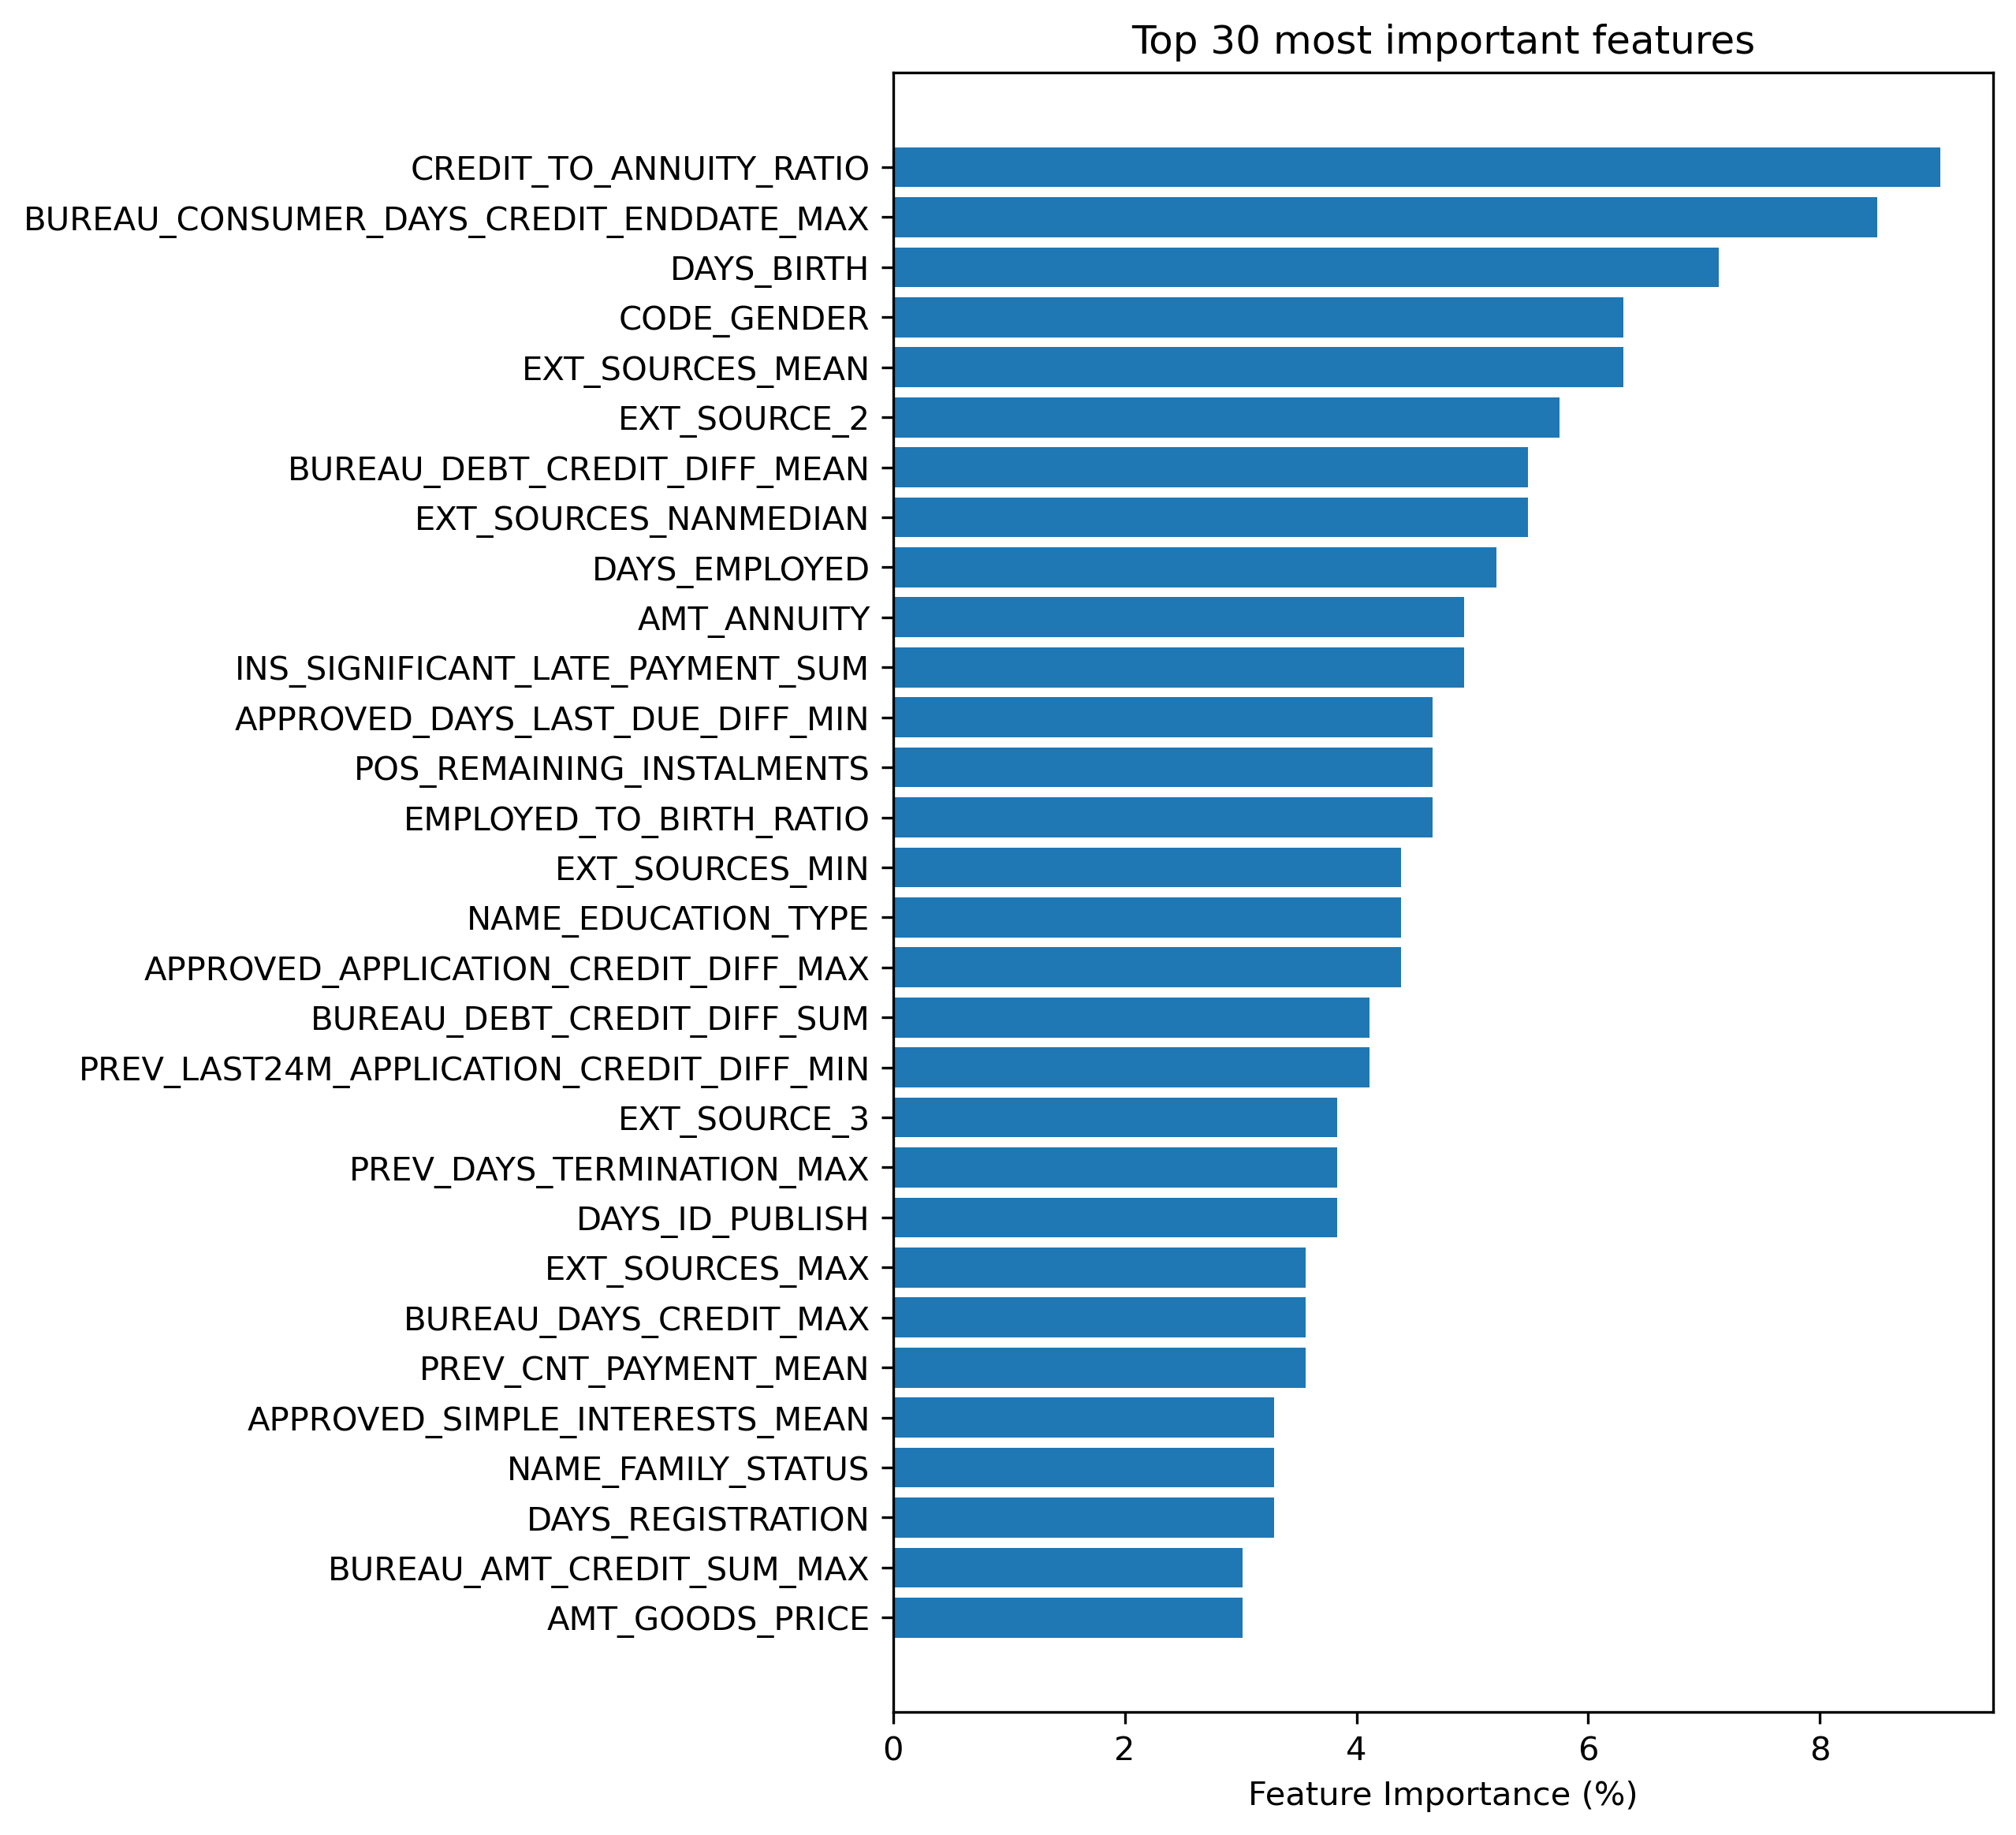

In [12]:
n_top_fts = 30

#model_pl_opt['model'].fit(X_TRAIN, y_TRAIN)

npa_top_fts = model_pl_opt['model'].feature_importances_.argsort()#[-n_top_fts:]

plt.figure(figsize=(6,9), dpi=300)

plt.barh(X_TRAIN.columns[npa_top_fts[-n_top_fts:]], model_pl_opt['model'].\
         feature_importances_[npa_top_fts[-n_top_fts:]] / len(X_TRAIN.columns) * 100)

plt.xlabel("Feature Importance (%)")
plt.title("Top %i most important features" % n_top_fts)

plt.show()

### b) SHAP

- doc 1: https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/bar.html
- doc 2: https://shap-lrjball.readthedocs.io/en/latest/generated/shap.dependence_plot.html

*NB: More about Kernel Explainer and its requirements for big datasets that Tree explainer bypasses:* https://colab.research.google.com/drive/1pjPzsw_uZew-Zcz646JTkRDhF2GkPk0N#scrollTo=SCOJFGMj3fq5

#### i. Library importation

In [13]:
import shap

shap.initjs()

#### ii. SHAP explanation

- Different explainers: https://snyk.io/advisor/python/shap/functions/shap.explainers.explainer.Explainer
- Background data or not & feature_perturbation = "interventional" or "tree_path_dependent" ? https://github.com/slundberg/shap/issues/1098 <br>
=> Background data: Closer to the model. <br>

*NB: According to the model (classifier or regressor) and the presence or not of background data, some graphics (such as shap.plots.bar()) won't behave the same way and might not be usable (for the classifiers mainly). Ex: shap.plots.bar can replaced by shap.plot_bar but such graphics are less detailed (as it can be noticed in a couple of cells below).*

In [14]:
%%time

# Select the number of the most important features to keep.
top_ft = 10

# Select the categorical class to base the explanations on (ex: 0 or 1 for binaries).
cat_class = 0

# Get the model and the scaler of the pipeline separatly.
# NB: Because the model type 'imblearn.pipeline.Pipeline' is not yet supported by TreeExplainer. 
#model_pl_label = 'scl_wt_lgbm_clf_fine_opt'
#model_pl = df_MODELS.loc[model_pl_label]['Models']
#scaler = model_pl['scaler']
#model = model_pl['model']
scaler = model_pl_opt['scaler']
model = model_pl_opt['model']

# Get the SHAP explanations of the observation.
explanations_global, delta_t = interpretability_shap(model, scaler,
                                                     X_TRAIN, X_TEST,
                                                     cat_class=cat_class)

# Get the average and the shap expected probabilities of the chosen class (1: postive, 0: negative).
yhat_mean = model_pl_opt.predict_proba(X_TRAIN).mean(axis=0)
yhat_shap_base_value_mean = explanations_global.base_values.mean(axis=0)

100%|===================| 48625/48744 [01:42<00:00]        

CPU times: total: 1min 43s
Wall time: 1min 42s


In [15]:
# Summarize relevant values.
print("Model used:\n", model)
print()
print("Model mean prediction probabilities on train data:", yhat_mean)
print()
print("Model mean proportions of the %i class predictions (=> Ratio of accepted applications (0) or denied (1)): %.3f" % (cat_class, yhat_mean[cat_class]))
print("SHAP expected mean proportions of the %s class predictions: %.3f" % (cat_class, yhat_shap_base_value_mean)) #explainer_shap.expected_value
print("SHAP explanation reliability index = %.3f" % (1 - abs(yhat_shap_base_value_mean - yhat_mean[cat_class])))
print()
print("Model prediction probabilities for the tested data:", model_pl_opt.predict_proba(X_TEST)[0])
print()
print("SHAP explainer run time:", round(delta_t, 2), "s")
print()

Model used:
 LGBMClassifier(class_weight='balanced', colsample_bytree=0.7,
               learning_rate=0.15, max_depth=100, min_child_weight=7,
               n_estimators=44, objective='binary', random_state=0,
               reg_alpha=0.0001, reg_lambda=1.0)

Model mean prediction probabilities on train data: [0.61825375 0.38174625]

Model mean proportions of the 0 class predictions (=> Ratio of accepted applications (0) or denied (1)): 0.618
SHAP expected mean proportions of the 0 class predictions: 0.587
SHAP explanation reliability index = 0.969

Model prediction probabilities for the tested data: [0.64347525 0.35652475]

SHAP explainer run time: 102.17 s



#### iii. Interpretations

__- Mean absolute shapley values__

In [16]:
# Get the most important features according to SHAP for the global features interpretation.
global_features = pd.DataFrame(explanations_global.values, columns = X_TRAIN.columns).apply(lambda x: np.mean(abs(x))).sort_values(ascending=False)
global_features

EXT_SOURCES_MEAN                           0.048882
EXT_SOURCES_NANMEDIAN                      0.039095
CODE_GENDER                                0.030552
CREDIT_TO_ANNUITY_RATIO                    0.020892
NAME_EDUCATION_TYPE                        0.017008
                                             ...   
POS_NAME_CONTRACT_STATUS_Approved_MEAN     0.000000
POS_NAME_CONTRACT_STATUS_Canceled_MEAN     0.000000
POS_NAME_CONTRACT_STATUS_Completed_MEAN    0.000000
POS_NAME_CONTRACT_STATUS_Demand_MEAN       0.000000
APPROVED_AMT_CREDIT_MEAN                   0.000000
Length: 365, dtype: float64

In [17]:
# Get the threshold above which features can be considered very important for the model.
top_10_shap_value_thr = round(global_features[:10].values[-1], 3)
top_10_shap_value_thr

0.011

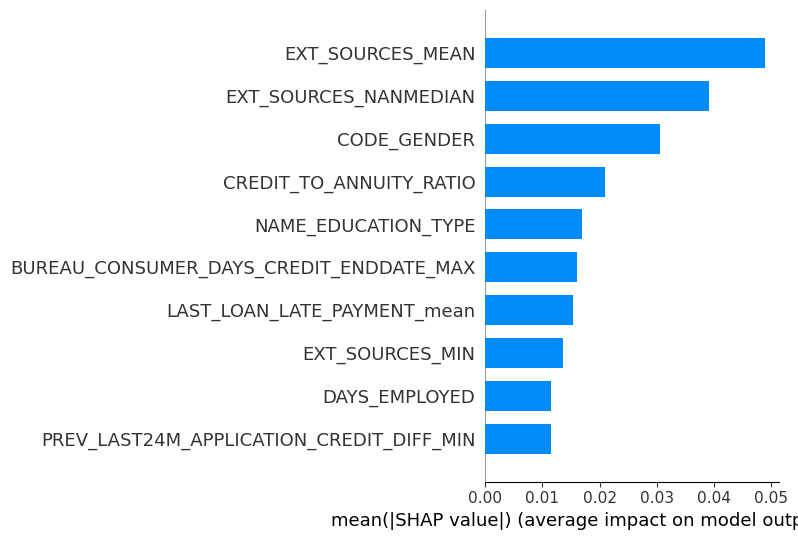

In [18]:
# Method 1:
shap.summary_plot(explanations_global, max_display=top_ft, plot_type='bar') #feature_names=X_TEST.columns,

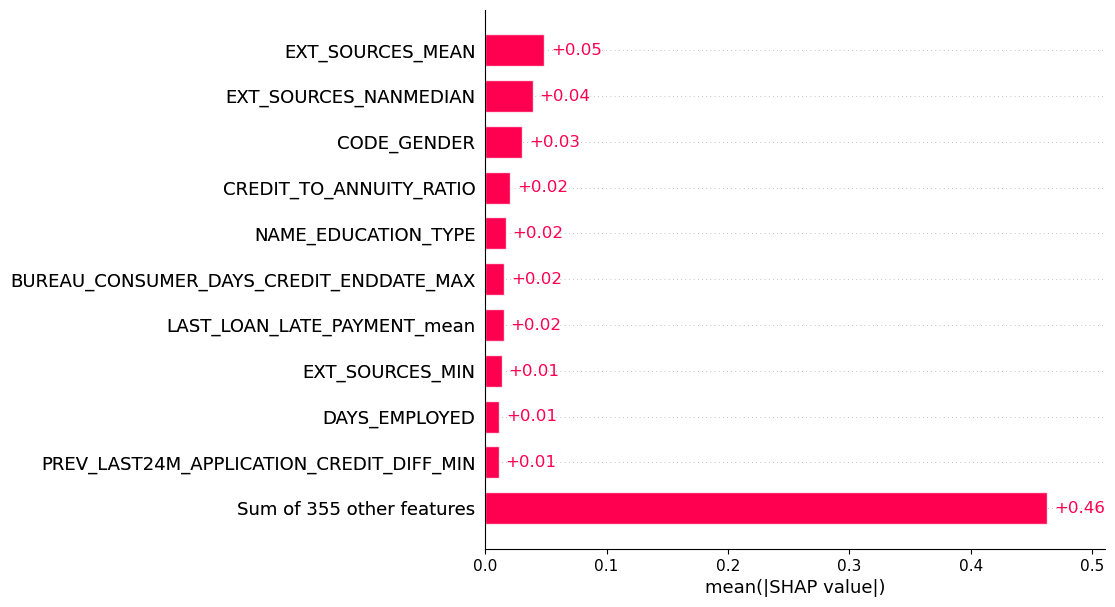

In [19]:
# Method 2 (with the absolute mean shapley values displayed):
# NB: As no feature_names parameter is present X_test_norm are reassociated with them in a df.
shap.plots.bar(explanations_global, max_display=top_ft+1)

In [20]:
# Method 3 (with the shapley values as text):
# Source: https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")
        
print_feature_importances_shap_values(explanations_global, X_TEST.columns)

EXT_SOURCES_MEAN -> 0.0489 (softmax = 0.0029)
EXT_SOURCES_NANMEDIAN -> 0.0391 (softmax = 0.0028)
CODE_GENDER -> 0.0306 (softmax = 0.0028)
CREDIT_TO_ANNUITY_RATIO -> 0.0209 (softmax = 0.0028)
NAME_EDUCATION_TYPE -> 0.0170 (softmax = 0.0028)
BUREAU_CONSUMER_DAYS_CREDIT_ENDDATE_MAX -> 0.0160 (softmax = 0.0028)
LAST_LOAN_LATE_PAYMENT_mean -> 0.0154 (softmax = 0.0028)
EXT_SOURCES_MIN -> 0.0135 (softmax = 0.0028)
DAYS_EMPLOYED -> 0.0116 (softmax = 0.0028)
PREV_LAST24M_APPLICATION_CREDIT_DIFF_MIN -> 0.0115 (softmax = 0.0028)
EXT_SOURCE_3 -> 0.0108 (softmax = 0.0028)
AMT_ANNUITY -> 0.0106 (softmax = 0.0028)
BUREAU_DEBT_CREDIT_DIFF_MEAN -> 0.0104 (softmax = 0.0028)
FLAG_OWN_CAR -> 0.0098 (softmax = 0.0028)
DAYS_BIRTH -> 0.0096 (softmax = 0.0028)
EMPLOYED_TO_BIRTH_RATIO -> 0.0095 (softmax = 0.0028)
NAME_FAMILY_STATUS -> 0.0093 (softmax = 0.0028)
INS_SIGNIFICANT_LATE_PAYMENT_SUM -> 0.0092 (softmax = 0.0028)
AMT_GOODS_PRICE -> 0.0091 (softmax = 0.0028)
EXT_SOURCES_MAX -> 0.0085 (softmax = 0.0028)


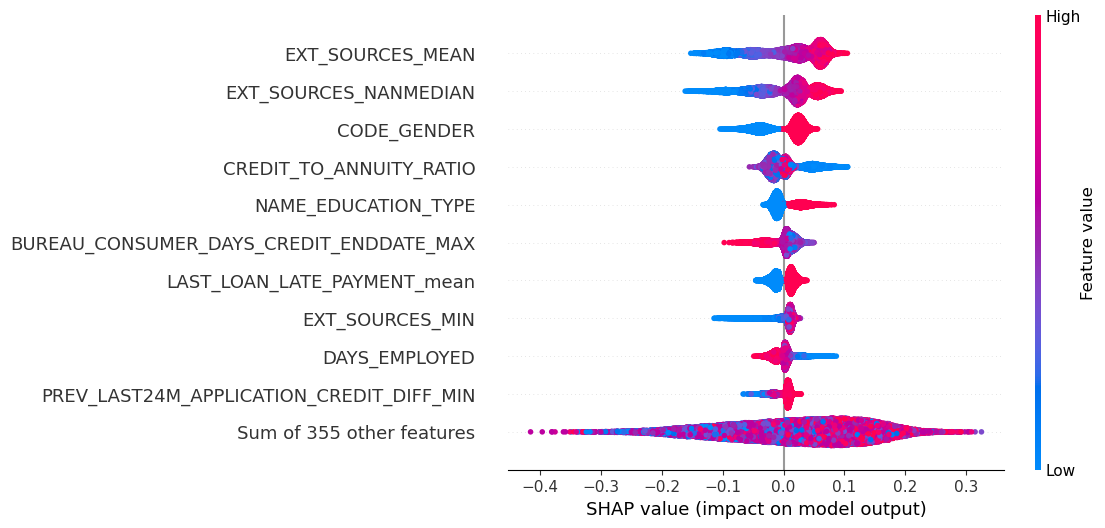

In [21]:
# Method 4 (Beeswarm):
# NB: Equivalent plot: shap.summary_plot(explanations, X_test_norm, feature_names=X_TEST.columns, max_display=top_ft, plot_type='dot')
shap.plots.beeswarm(explanations_global, max_display=top_ft+1)

__- Features' influences and dependences__

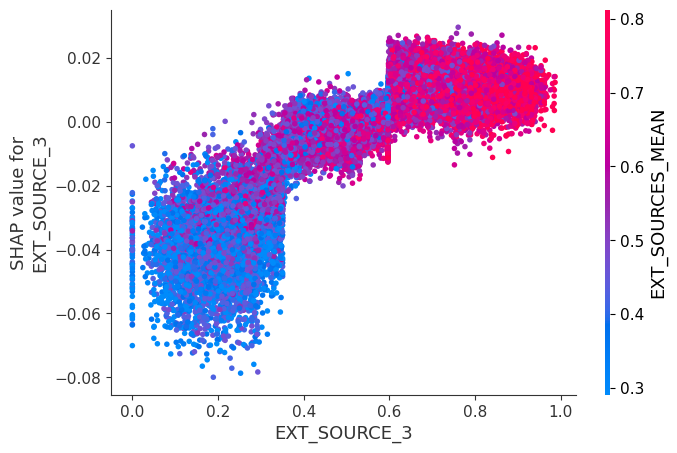

In [22]:
# Detail features influences on predictions.
X_test_norm = pd.DataFrame(scaler.transform(X_TEST), columns=X_TEST.columns)
shap.dependence_plot('EXT_SOURCE_3', explanations_global.values, X_test_norm, interaction_index='EXT_SOURCES_MEAN') #feature_names=X_TEST.columns

#### iv. Save global interpretations

In [23]:
# Create or overwrite the file containing the report.
with open(os.path.join(SHAP_INTERPRETATIONS_DIR_PATH, 'global_shap_explanations.pkl'), "wb") as explanations_global_file:
    pickle.dump(explanations_global, explanations_global_file)

## 2) Local

### a) SHAP

#### i. Show customers IDs with a denied recommendation

In [24]:
# Show customers IDs denied application.
n_bad_ids = 0
for i, idx in enumerate(range(len(model_pl_opt.predict_proba(X_test_norm)))):
    #print(clf.predict_proba(X_test_norm)[0])
    if model_pl_opt.predict_proba(X_test_norm)[i][0] < 0.3:
        print(idx, model_pl_opt.predict_proba(X_test_norm)[i])
        n_bad_ids += 1
        
        # Break the loop after the set number of denied IDs printed to go faster.
        if n_bad_ids > 20:
            print("Limit reached => Loop broken.")
            break

9 [0.27753754 0.72246246]
74 [0.18243057 0.81756943]
87 [0.25220111 0.74779889]
94 [0.19334494 0.80665506]
96 [0.24555808 0.75444192]
97 [0.28334787 0.71665213]
114 [0.26894045 0.73105955]
128 [0.26545915 0.73454085]
139 [0.26114833 0.73885167]
155 [0.28845352 0.71154648]
172 [0.26703892 0.73296108]
179 [0.24421931 0.75578069]
190 [0.22984924 0.77015076]
202 [0.20846552 0.79153448]
211 [0.27587336 0.72412664]
212 [0.27506403 0.72493597]
215 [0.13204333 0.86795667]
225 [0.27820907 0.72179093]
234 [0.29352862 0.70647138]
253 [0.22795478 0.77204522]
264 [0.2336998 0.7663002]
Limit reached => Loop broken.


#### ii. SHAP explanation

In [25]:
# Select the customer to observe by its ID.
customer_id = df_test.index[139] #118485 #118464

# Select the number of the most important features to show.
top_ft = 10

# Select the categorical class to base the explanations on (ex: 0 or 1 for binaries).
cat_class = 0

# Get the model and the scaler of the pipeline.
#model_pl_label = 'scl_wt_lgbm_clf_fine_opt'
#model_pl = df_MODELS.loc[model_pl_label]['Models']
#scaler = model_pl['scaler']
#model = model_pl['model']
scaler = model_pl_opt['scaler']
model = model_pl_opt['model']

# Get the corresponding customer index within the df or numpy array.
#customer_df_idx = list(df_test.index).index(customer_id)

# Get the SHAP explanations of the observation.
explanations_local, delta_t = interpretability_shap(model, scaler,
                                              X_TRAIN, X_TEST.loc[[customer_id]],
                                              cat_class=cat_class)

# Get the average and the shap expected probabilities of the chosen class (1: postive, 0: negative).
yhat_mean = model_pl_opt.predict_proba(X_TRAIN).mean(axis=0)
yhat_shap_base_value_mean = explanations_local.base_values.mean(axis=0)

In [26]:
# Summarize relevant values.
print("Model used:\n", model)
print()
print("Model mean prediction probabilities on train data:", yhat_mean)
print()
print("Model mean proportions of the %i class predictions (=> Ratio of accepted applications (0) or denied (1)): %.3f" % (cat_class, yhat_mean[cat_class]))
print("SHAP expected mean proportions of the %s class predictions: %.3f" % (cat_class, yhat_shap_base_value_mean)) #explainer_shap.expected_value
print("SHAP explanation reliability index = %.3f" % (1 - abs(yhat_shap_base_value_mean - yhat_mean[cat_class])))
print()
print("Model prediction probabilities for the tested data:", model_pl_opt.predict_proba(X_TEST.loc[[customer_id]])[0])
print()
print("SHAP explainer run time:", round(delta_t, 2), "s")
print()

Model used:
 LGBMClassifier(class_weight='balanced', colsample_bytree=0.7,
               learning_rate=0.15, max_depth=100, min_child_weight=7,
               n_estimators=44, objective='binary', random_state=0,
               reg_alpha=0.0001, reg_lambda=1.0)

Model mean prediction probabilities on train data: [0.61825375 0.38174625]

Model mean proportions of the 0 class predictions (=> Ratio of accepted applications (0) or denied (1)): 0.618
SHAP expected mean proportions of the 0 class predictions: 0.587
SHAP explanation reliability index = 0.969

Model prediction probabilities for the tested data: [0.2624615 0.7375385]

SHAP explainer run time: 0.04 s



#### iii. Interpretations

__- Mean absolute shapley values__

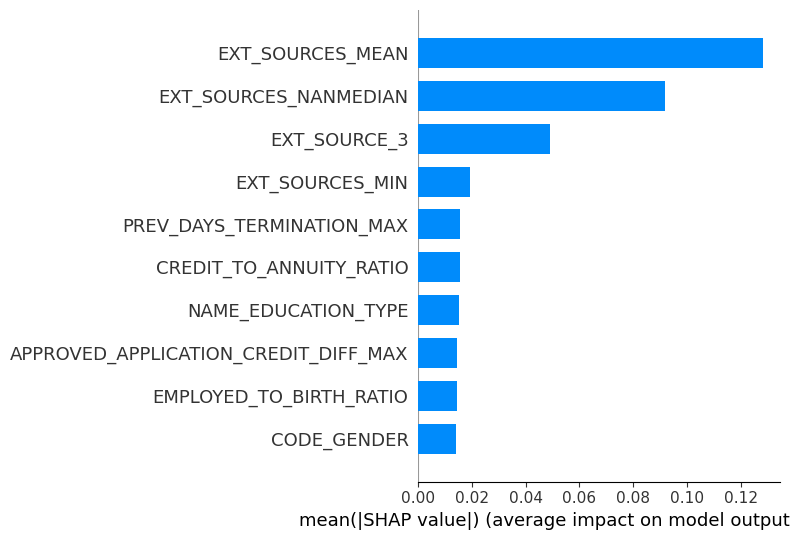

In [27]:
# Method 1:
shap.summary_plot(explanations_local, max_display=top_ft, plot_type='bar') #feature_names=X_TEST.columns,

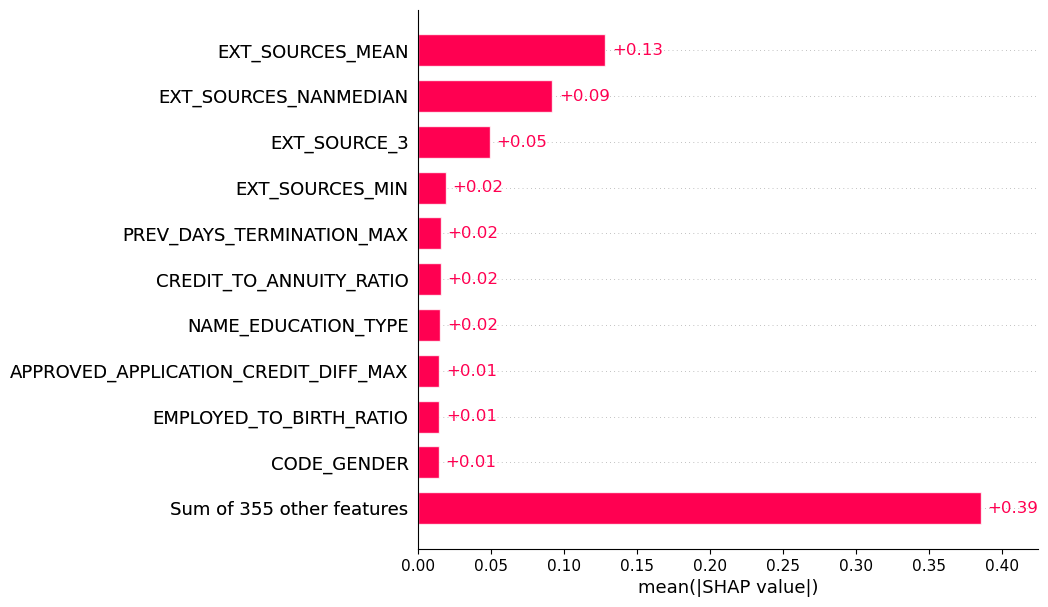

In [28]:
# Method 2 (with the absolute mean shapley values displayed):
# NB: As no feature_names parameter is present X_test_norm are reassociated with them in a df.
shap.plots.bar(explanations_local, max_display=top_ft+1)

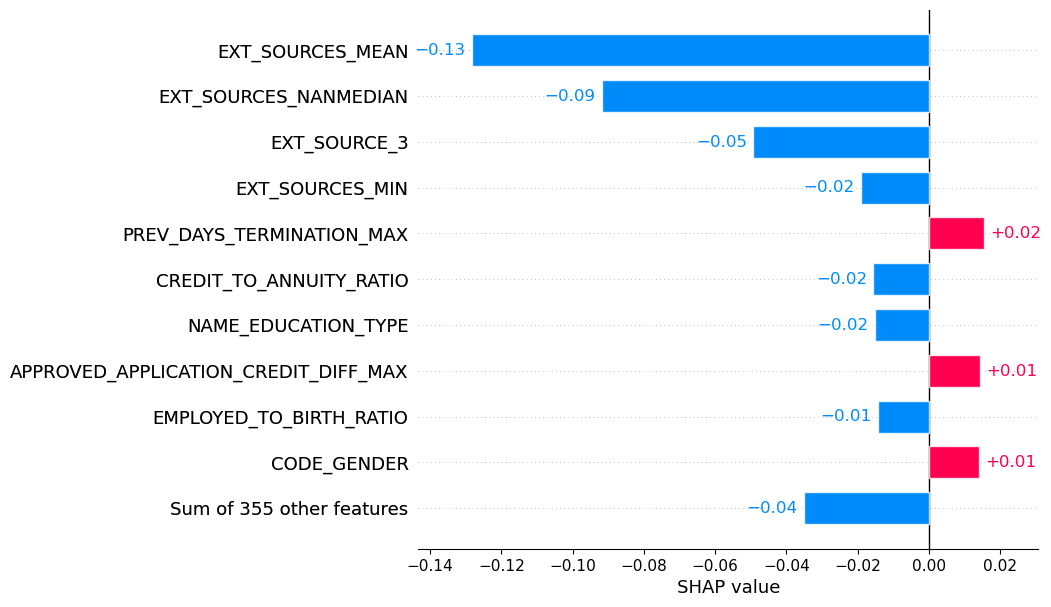

In [29]:
# Method 3 (with the mean shapley values displayed):
# NB: As no feature_names parameter is present X_test_norm are reassociated with them in a df.
shap.plots.bar(explanations_local[0], max_display=top_ft+1)

__- Force plots__

In [30]:
### Shape 1: Condensed ###

# NB1: f(x) scale coorresponds to the log odd (=> It shoud be <= 0 for positive ).
#      => In order to get the corresponding probability P = 10^(log odd value).
# NB2: .force_plot() seems to be the same as .plots.force().
#shap.plots.force(explainer_shap.expected_value[1], explanations[1], X_test_norm_sp, feature_names=X_TEST.columns)
shap.plots.force(explanations_local[0])

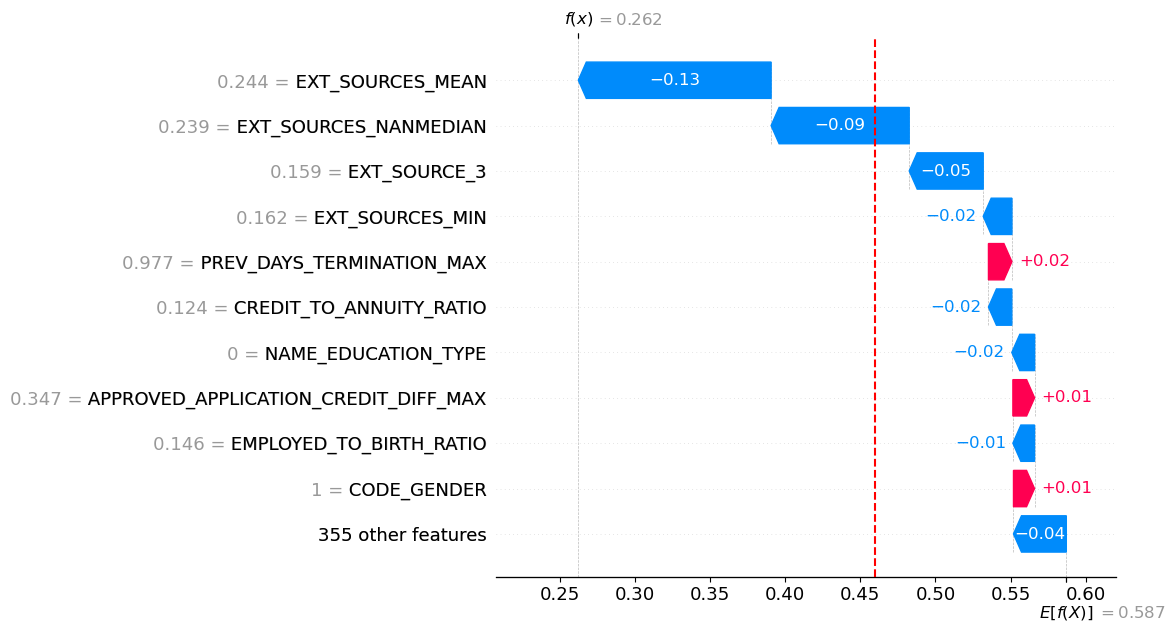

In [31]:
### Shape 2: Detailed ###

# Transform the log odds default model values to their odd counterpart which
# is an easier scale to interpret for none professional people.
# NB: The argument "show=False" allows to not display the graph immediately in order to allows further customization with
#     matplotlib or seaborn or other... before displaying the graph with a "plt.show()".
shap.plots.waterfall(explanations_local[0], top_ft+1, show=False)  
plt.axvline(x=df_models_sum.iloc[-1,3], color='r', linestyle='--')
#plt.xticks()
plt.show()

# III) Data drift analysis: Evidently

## 1) Additional importation

### a) Libraries

In [32]:
import json

import evidently

#from evidently import ColumnMapping

from evidently.report import Report
#from evidently.metrics.base_metric import generate_column_metrics
from evidently.metric_preset import DataDriftPreset#, TargetDriftPreset, DataQualityPreset, RegressionPreset
from evidently.metrics import *

#from evidently.test_suite import TestSuite
#from evidently.tests.base_test import generate_column_tests
#from evidently.test_preset import DataStabilityTestPreset, NoTargetPerformanceTestPreset, RegressionTestPreset
#from evidently.tests import *

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### b) Global path

In [33]:
EXPORTS_DATA_DRIFT_DIR_PATH = r'Exports\Data_drift'

## 2) Functions

In [34]:
def jprint (json_text, indent=4, sort_keys=False):
    
    """ Print a python dictionary in a json more readable format. """
    
    # Creates a better formatted string than the default python JSON text.
    json_text_printable = json.dumps(json_text, indent=indent, sort_keys=sort_keys) # NB: sort_keys sorts all elements of the JSON from top to bottom or the reverse.
    print(json_text_printable)

## 3) Data drift

### a) Evidently report

In [35]:
# Get the number of most important features to check for the model.
n_top_fts = len((global_features[global_features >= 0.001]))

# Get the most important features labels.
global_top_fts_labels = global_features.to_frame().index[:n_top_fts]

In [ ]:
STOP

In [ ]:
%%time

# Data drift summary (report).
report_current = Report(metrics=[DataDriftPreset()])
report_current.run(reference_data=X_TRAIN.reset_index(drop=True)[global_top_fts_labels],
           current_data=X_TEST.reset_index(drop=True)[global_top_fts_labels])

In [ ]:
# Show the report.
report_current

### b) Report storage

In [ ]:
# Create or overwrite the file containing the report.
with open(os.path.join(EXPORTS_DATA_DRIFT_DIR_PATH, 'evidently_report.pkl'), "wb") as report_file:
    pickle.dump(report_current, report_file)

# Save the report as an html file.
report_current.save_html(os.path.join(EXPORTS_DATA_DRIFT_DIR_PATH, 'evidently_report.html'))

In [ ]:
STOP

In [37]:
# Load the report from the storage file.
with open(os.path.join(EXPORTS_DATA_DRIFT_DIR_PATH, 'evidently_report.pkl'), "rb") as report_file:
    report_current = pickle.load(report_file)

### c) SHAP values of features with significant data drift
This will allow to see if drifting features are important or negligeable input for the model.

In [40]:
def highlight_top_features (df, shap_value_thr):
        
    """ Highlight the most important features for the model. """
    
    # NB: Color the text in black if an else is reqiured tu fill white spaces (color: #000000).
    return ['background-color: salmon' if df.iloc[i] >= shap_value_thr else '' for i in range(df.shape[0])] # Red color: #E8000B

In [41]:
# Get a look at the structure of the evidently report.
jprint(report_current.as_dict())

{
    "metrics": [
        {
            "metric": "DatasetDriftMetric",
            "result": {
                "drift_share": 0.5,
                "number_of_columns": 169,
                "number_of_drifted_columns": 1,
                "share_of_drifted_columns": 0.005917159763313609,
                "dataset_drift": false
            }
        },
        {
            "metric": "DataDriftTable",
            "result": {
                "number_of_columns": 169,
                "number_of_drifted_columns": 1,
                "share_of_drifted_columns": 0.005917159763313609,
                "dataset_drift": false,
                "drift_by_columns": {
                    "AGE_RANGE": {
                        "column_name": "AGE_RANGE",
                        "column_type": "num",
                        "stattest_name": "Jensen-Shannon distance",
                        "stattest_threshold": 0.1,
                        "drift_score": 0.010632678040589573,
                        "d

In [42]:
# Get the section in which search in report.
search_section = report_current.as_dict()['metrics'][1]['result']['drift_by_columns']

# Get the list of features with significant data drift.
l_drift_features = [feature for feature in search_section.keys() if search_section[feature]['drift_detected']]

# Check the shap values of features with significant data drift.
print("SHAP values of features with significant data drift:")
df_shap_values_drifted_features = global_features[l_drift_features].to_frame().rename({0: 'absolute_shap_values'}, axis='columns')

# Set the dataframe style in order to highlight top features for the model which drifted.
df_shap_values_drifted_features = df_shap_values_drifted_features.style.apply(highlight_top_features, shap_value_thr=top_10_shap_value_thr)
df_shap_values_drifted_features

SHAP values of features with significant data drift:


## 4) Simulation overtime

### a) Functions

In [43]:
def select_time_period (df, range_limit_min = 0, range_limit_max = 0, time_period_col = 'DAYS_REGISTRATION'):
    
    """
    Description
    -----------
    Reduce the dataframe in the desired time period partition.
    
    Parameters
    ----------
    df: pandas.Dataframe()
        Dataframe to process.
    time_period_col: str
        Column's name in which to get the datetimes.

    Return: pandas.DataFrame()
    ------
    Returns the selected partition.
        
    """
          
    # Get the partition.
    df = df[(df[time_period_col] <= -range_limit_min * 365.25) &
            (df[time_period_col] >= -range_limit_max * 365.25)]
    
    # Display the partition datetime's range.
    print("Partition period: [%.2f, %.2f] => %.2f" %
          (abs(df['DAYS_REGISTRATION'].min() / 365.25), 
           abs(df['DAYS_REGISTRATION'].max() / 365.25),
           abs(df['DAYS_REGISTRATION'].min() / 365.25) - abs(df['DAYS_REGISTRATION'].max() / 365.25)),
          "years"
          )
    print("Number of customers within the partition:", df.shape[0])
   
    return df

### b) Simulation

In [44]:
mean_days_per_month = np.mean([31]*7 + [30]*4 + [28])

total_period_range = round(abs(X_TRAIN['DAYS_REGISTRATION'].min() / 365.25), 2)
print("Longest registered customer of the train set:", round(abs(X_TRAIN['DAYS_REGISTRATION'].min() / 365.25), 2), "years")
print("Shortest registered customer of the train set:", abs(X_TRAIN['DAYS_REGISTRATION'].max()), "day")
print("Total period range:", round(abs(X_TRAIN['DAYS_REGISTRATION'].min() / 365.25), 2), "years")

Longest registered customer of the train set: 57.08 years
Shortest registered customer of the train set: 0 day
Total period range: 57.08 years


In [45]:
%%time

# Set time periods.
period_start = 20 # Period of the reference. NB: in order to get enough customers as reference.
period_step = 2 # Period of time between each data drift test.

# Get the oldest registration time of the train set.
oldest_registration = abs(X_TRAIN['DAYS_REGISTRATION'].min() / 365.25)

# Selected reference partition within the train set.
count = 0 # Give a number to each partition.
print("- Reference partition #%i:" % count)
partition_ref = select_time_period(X_TRAIN, oldest_registration - period_start, oldest_registration)
print()

# Initialize the evidently data drift report.
#report_simulation = Report(metrics=[DataDriftPreset(cat_stattest='ks', drift_share=0.33)]) #cat_statest_threshold=0.05,

l_reports = []
#l_reports_periods = []
l_n_drifted_features = []
drift_share = 0.33
l_periods = abs(np.arange(-oldest_registration + period_start, period_step, period_step) + oldest_registration - period_start)
for period in l_periods:
    
    # Set the low limit of the period range to consider.
    range_limit_min = oldest_registration - period_start - period
    range_limit_max = oldest_registration #- period # NB: Commenting or not this row allows to take into account the previous partitions into the new one or not.

    # Selected current test partition within the test set.
    print("- Current partition #%i:" % count)
    partition_curr = select_time_period(X_TRAIN, range_limit_min, range_limit_max)
    
    # Data drift summary (report).
    # NB: Report is re-initialize at each iteration for easier management and display of the HTML table.
    report_simulation = Report(metrics=[DataDriftPreset(cat_stattest='ks', drift_share=drift_share)]) #cat_statest_threshold=0.05,
    report_simulation.run(reference_data=partition_ref.reset_index(drop=True)[global_top_fts_labels],
                          current_data=partition_curr.reset_index(drop=True)[global_top_fts_labels])
    
    # Get the number of detected drifted features for the partition.
    l_reports.append(([range_limit_min, range_limit_max], report_simulation))
    #l_reports_periods.append((range_limit_min, range_limit_max))
    l_n_drifted_features.append(report_simulation.as_dict()['metrics'][0]['result']['number_of_drifted_columns']) #[0] => [count]
    print("Number of drifted features found:", l_n_drifted_features[count])
    
    # Update the partition number.
    count += 1
    
    print()
    
print("Number of drifted features found all over the full simulation period:\n", l_n_drifted_features)
print()

- Reference partition #0:
Partition period: [57.08, 37.08] => 20.00 years
Number of customers within the partition: 933

- Current partition #0:
Partition period: [57.08, 37.08] => 20.00 years
Number of customers within the partition: 933
Number of drifted features found: 0

- Current partition #1:
Partition period: [57.08, 35.09] => 21.99 years
Number of customers within the partition: 1677
Number of drifted features found: 3

- Current partition #2:
Partition period: [57.08, 33.10] => 23.98 years
Number of customers within the partition: 2659
Number of drifted features found: 12

- Current partition #3:
Partition period: [57.08, 31.08] => 26.00 years
Number of customers within the partition: 3803
Number of drifted features found: 20

- Current partition #4:
Partition period: [57.08, 29.09] => 27.99 years
Number of customers within the partition: 5416
Number of drifted features found: 45

- Current partition #5:
Partition period: [57.08, 27.09] => 29.98 years
Number of customers withi

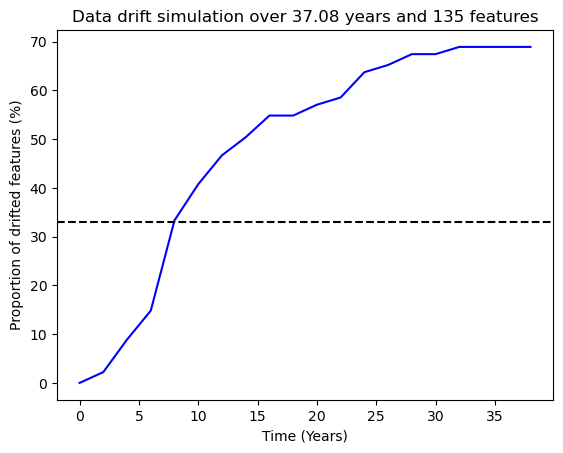

In [46]:
# Draw the figure of the simulated data drift overtime.
plt.plot(l_periods, (np.array(l_n_drifted_features) / n_top_fts * 100), color='b')
plt.title("Data drift simulation over %.2f years and %i features" % ((total_period_range - period_start), n_top_fts))
plt.xlabel("Time (Years)")
plt.ylabel("Proportion of drifted features (%)") #"Number of drifted features"
plt.axhline(drift_share * 100, color='k', linestyle='--')
plt.show()

### c) Results

#### i. Shows the HTML table of the last report

In [47]:
# Select the year corresponding the detection of the dataset drift.
select_year = 10

# Display the correpsonding HTML table.
l_reports[int(round(select_year / period_step, 0))][1]
#report_simulation

#### ii. Checking the importance of the drifted features

In [48]:
# Get the section in which search in report.
search_section = l_reports[int(round(select_year / period_step, 0))][1].as_dict()['metrics'][1]['result']['drift_by_columns']

# Get the list of features with significant data drift.
l_drift_features = [feature for feature in search_section.keys() if search_section[feature]['drift_detected']]

# Check the shap values of features with significant data drift.
print("SHAP values of the %i features with a significant data drift after %.2f:" % (len(l_drift_features), select_year))
df_shap_values_drifted_features = global_features[l_drift_features].sort_values(ascending=False).to_frame().rename({0: 'absolute_shap_values'}, axis='columns')

# Set the dataframe style in order to highlight top features for the model which drifted.
df_shap_values_drifted_features = df_shap_values_drifted_features.style.apply(highlight_top_features, shap_value_thr=top_10_shap_value_thr)
df_shap_values_drifted_features

SHAP values of the 55 features with a significant data drift after 10.00:
